# Install Requierments

In [ ]:
!pip install -q mediapipe==0.10.0

In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

# Import Libraries

In [ ]:
# STEP 1: Import the necessary modules.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Helper Functions

In [ ]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

# Model Functions

In [ ]:
def Hide_Object_Images(path):
  # STEP 2: Create an PoseLandmarker object.
  base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
  options = vision.PoseLandmarkerOptions(base_options=base_options,output_segmentation_masks=True)
  detector = vision.PoseLandmarker.create_from_options(options)

  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(path)

  # STEP 4: Detect pose landmarks from the input image.
  detection_result = detector.detect(image)
  # STEP 5: Process the detection result. In this case, visualize it.
  annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
  cv2_imshow(annotated_image)
  segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
  visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
  visualized_mask_ = visualized_mask.astype(int)
  cv2_imshow(visualized_mask)
  visualized_mask_conv = visualized_mask_^(visualized_mask_&1==visualized_mask_)
  annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
  cv2_imshow(annotated_image)
  annotated_segment = visualized_mask_conv * annotated_image
  cv2_imshow(annotated_segment)

In [ ]:
def Hide_Object_Videos(path):
    # STEP 2: Create a PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
    options = vision.PoseLandmarkerOptions(base_options=base_options, output_segmentation_masks=True)
    detector = vision.PoseLandmarker.create_from_options(options)

    # Open the video file
    cap = cv2.VideoCapture(path)

    # Create a VideoWriter to save the output video
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_video = cv2.VideoWriter('Hide_Object_Video.mp4', fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Ignoring empty frame.")
            break

        # Convert the frame to RGB and uint8 data type
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = frame_rgb.astype(np.uint8)

        # Convert the frame to MediaPipe Image format
        image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)

        # Detect pose landmarks and segmentation masks from the frame
        detection_result = detector.detect(image)

        if detection_result.segmentation_masks is None:
            print("No segmentation masks found. Skipping frame.")
            continue

        # Process the detection result
        annotated_image = draw_landmarks_on_image(frame_rgb, detection_result)
        annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
        visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
        visualized_mask = visualized_mask.astype(np.uint8)
        visualized_mask_conv = visualized_mask ^ (visualized_mask & 1 == visualized_mask)
        annotated_segment = visualized_mask_conv * annotated_image
        # annotated_segment = cv2.cvtColor(annotated_segment, cv2.COLOR_BGR2RGB)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # Write the processed frame to the output video file
        output_video.write(annotated_segment)

    # Release the video capture and writer objects
    cap.release()
    output_video.release()
    cv2.destroyAllWindows()

# Model

## Images

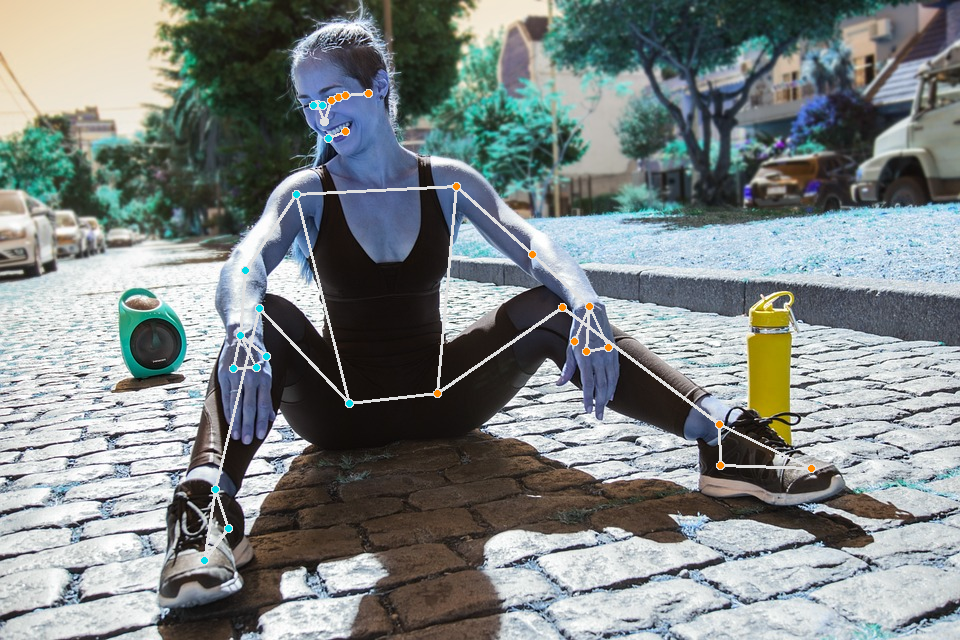

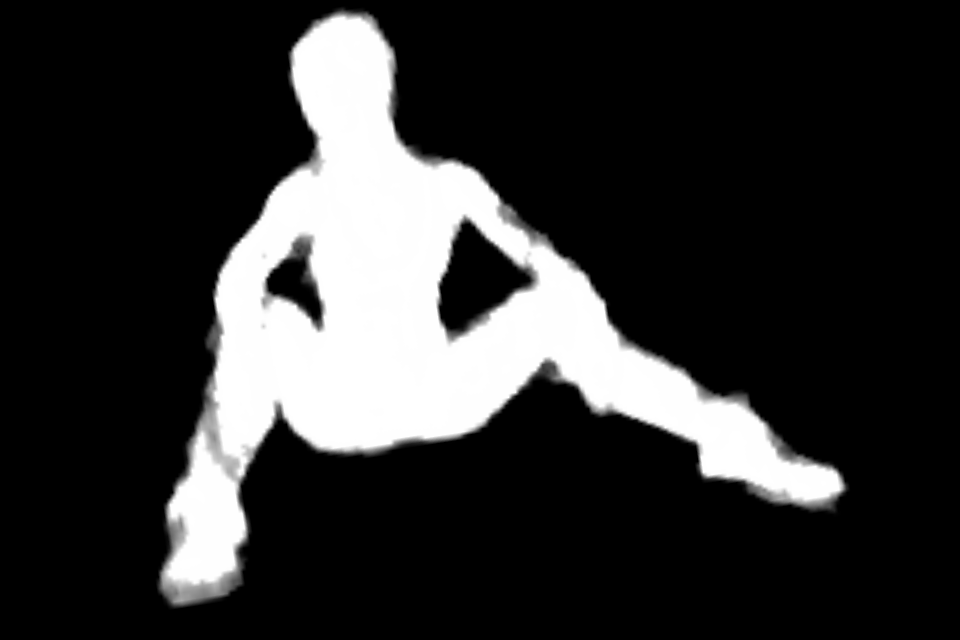

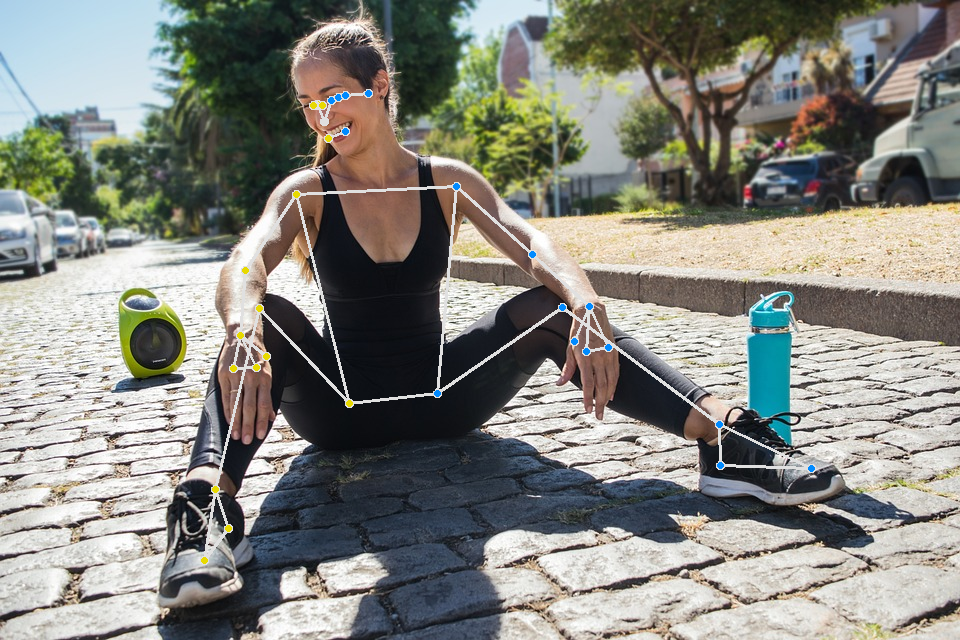

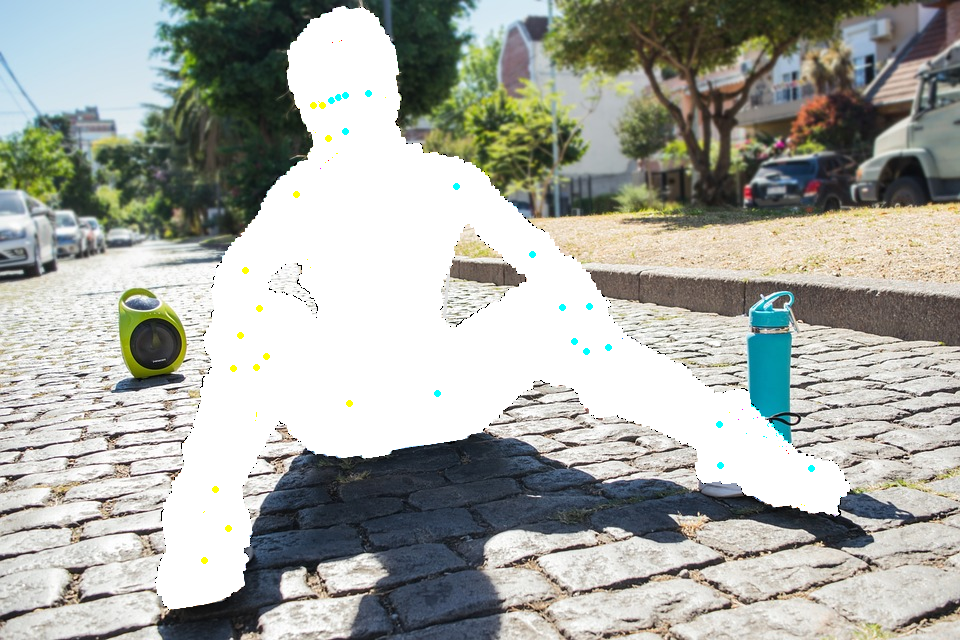

In [ ]:
# Call the function to process the Image

Hide_Object_Images('/content/download.png')

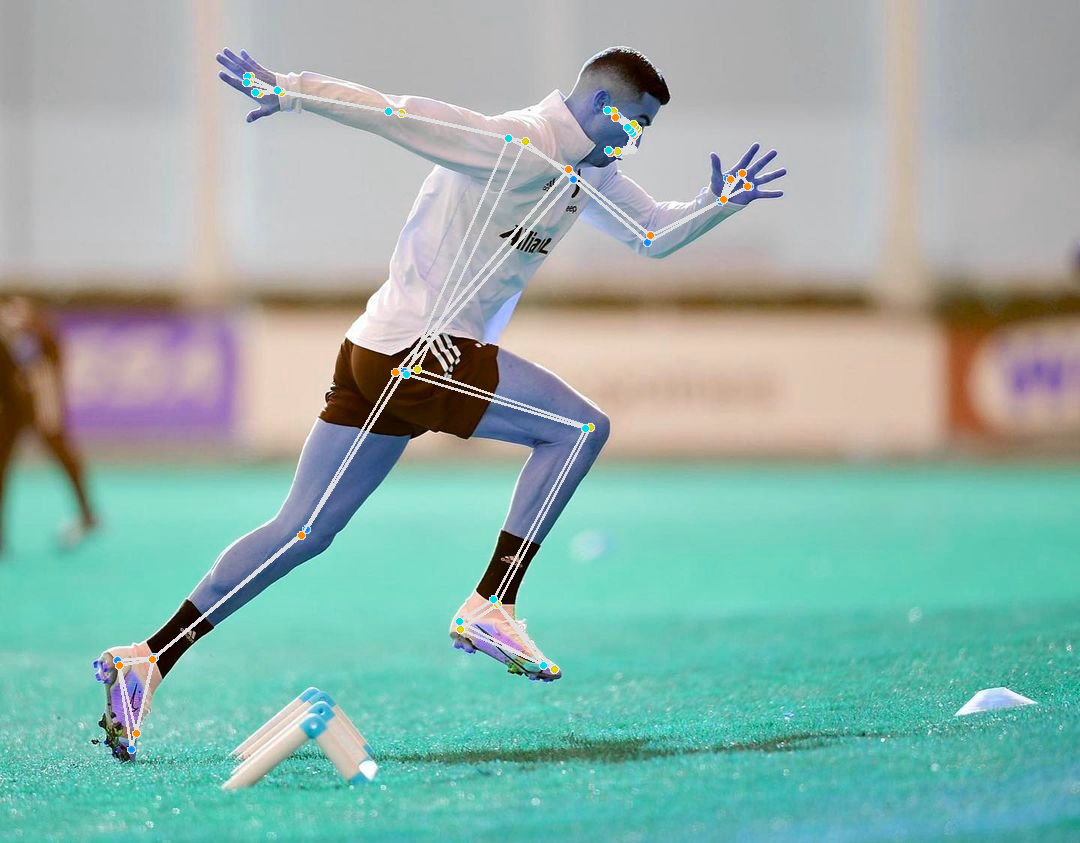

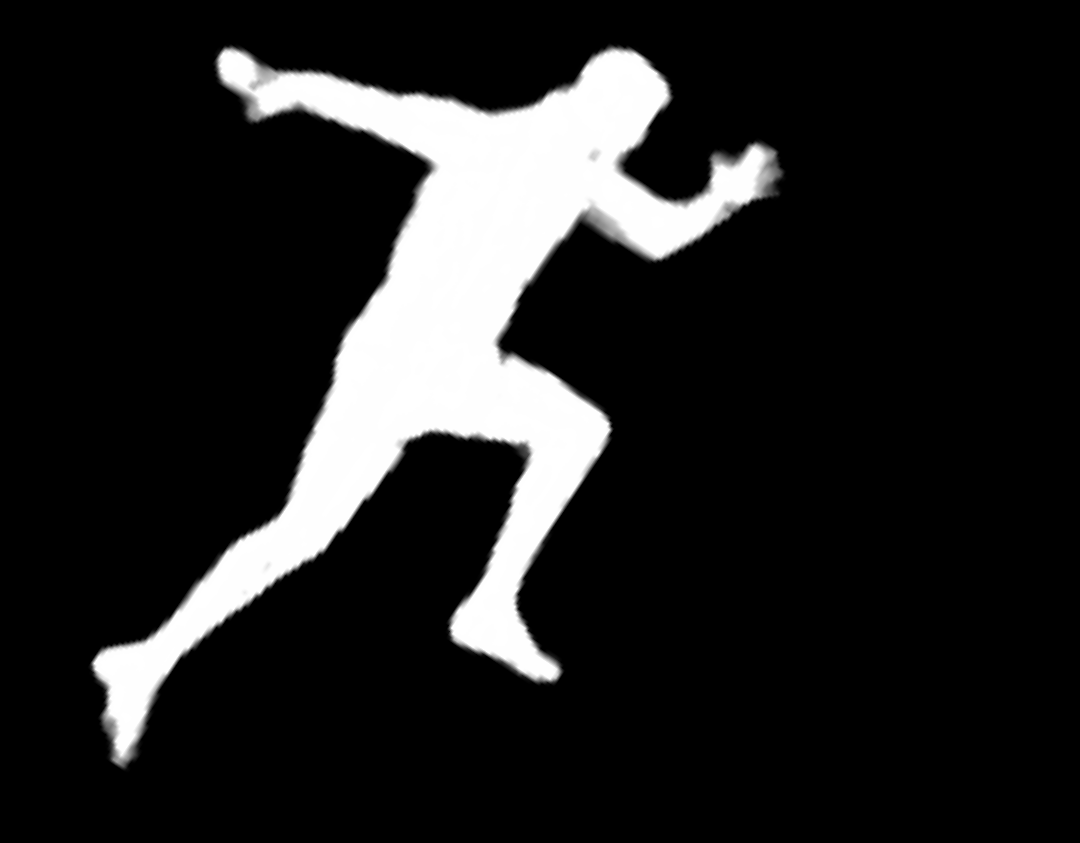

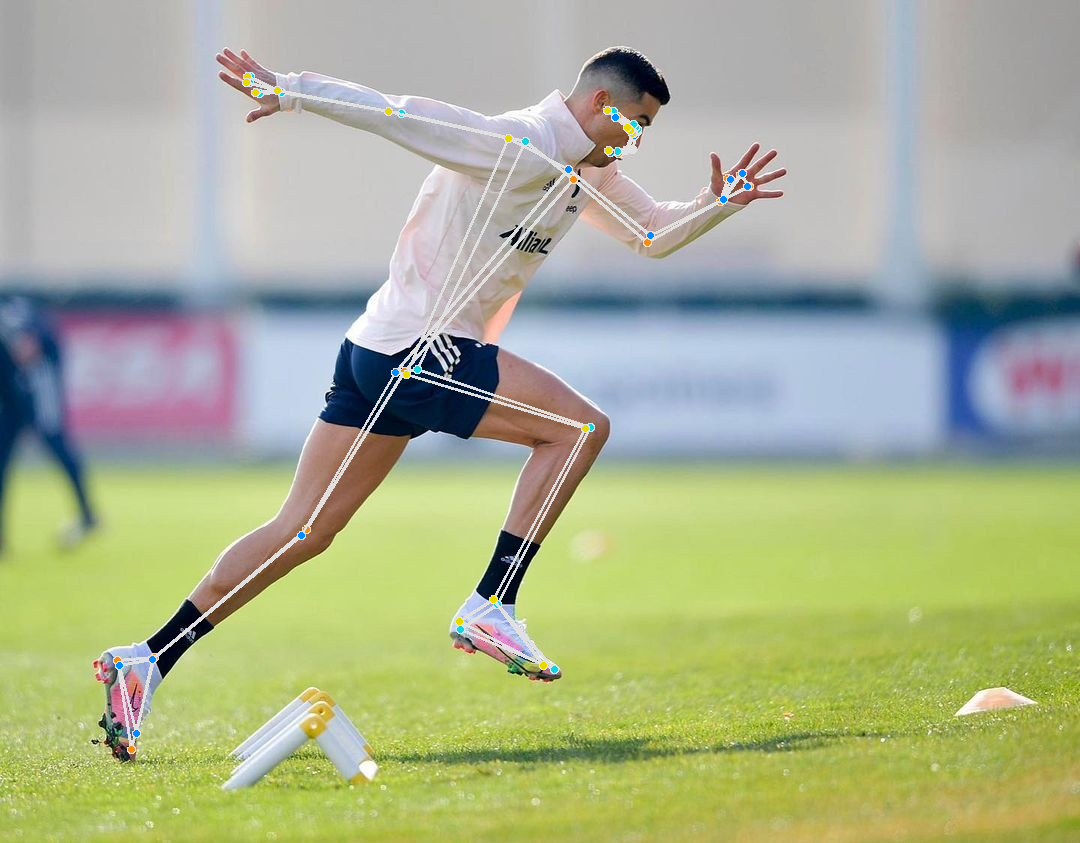

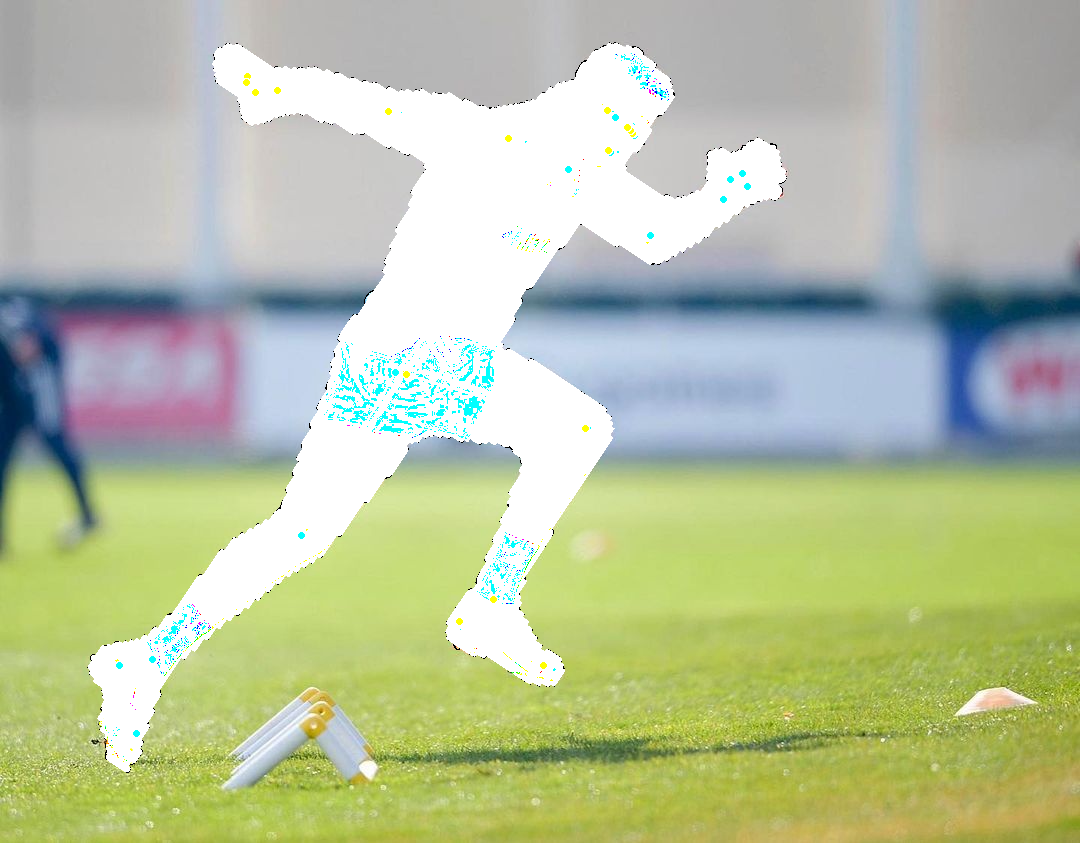

In [ ]:
# Call the function to process the Image

Hide_Object_Images('/content/M4LO2f884bSb3876b5.jpg')

## Video

In [ ]:
# Call the function to process the video

Hide_Object_Videos('/content/test.mp4')

No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segmentation masks found. Skipping frame.
No segment